In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

In [3]:
from filtering.utils import simulate as sim
from filtering.filtering import kf

# Simulating Data

In [4]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 2000

In [15]:
true_params = [r, 2.2, 0.15, 0.3, -0.6, 0.02]
init_params = [0.45, 3, 0.05, 0.5, -0.2, 0.13]

In [16]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

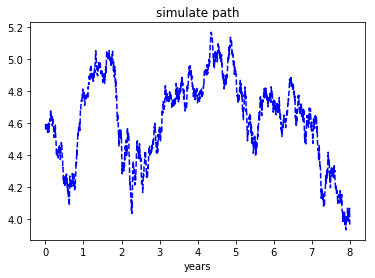

In [17]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]


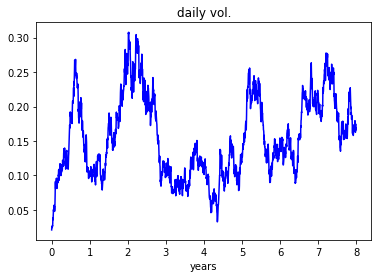

In [18]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [19]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [20]:
ekf = kf.EKFHeston(np.array(y[0, :])[0])

### Initial path vs. true path

In [21]:
y_, vol_ = ekf.filter(np.array(y[0, :])[0], init_params)

params: [0.45, 3, 0.05, 0.5, -0.2, 0.13]


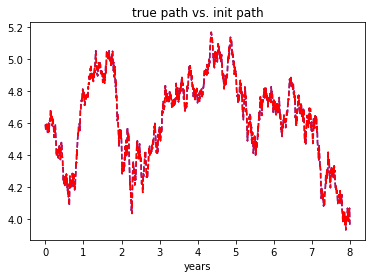

In [22]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]
# neg vol (pred): 0


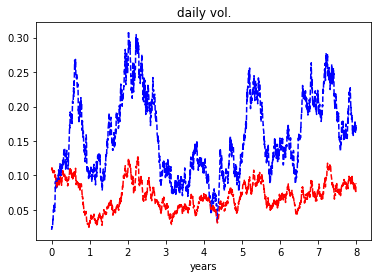

In [23]:
print("# neg vol:", sum(y[1,1:].T<0))
print("# neg vol (pred):", sum(vol_<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, vol_.T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# Optimization

### Note: Optimization takes time..., run for longer iterations

In [24]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.45, 3, 0.05, 0.5, -0.2, 0.13]
True Params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]


In [26]:
params_opt = ekf.optimize(init_params, maxiter=20000)

i: 1
x_i: [ 0.45    3.      0.05    0.5    -0.2     0.1365]
f_i: -5.972900731613194
i: 2
x_i: [ 0.45    3.      0.05    0.5    -0.2     0.1365]
f_i: -5.972900731613194
i: 3
x_i: [ 0.45    3.      0.05    0.5    -0.2     0.1365]
f_i: -5.972900731613194
i: 4
x_i: [ 0.45    3.      0.05    0.5    -0.2     0.1365]
f_i: -5.972900731613194
i: 5
x_i: [ 0.42333333  3.06203704  0.05395062  0.47700617 -0.20024691  0.1402716 ]
f_i: -5.976355063999621
i: 6
x_i: [ 0.42333333  3.06203704  0.05395062  0.47700617 -0.20024691  0.1402716 ]
f_i: -5.976355063999621
i: 7
x_i: [ 0.42333333  3.06203704  0.05395062  0.47700617 -0.20024691  0.1402716 ]
f_i: -5.976355063999621
i: 8
x_i: [ 0.42388889  2.9404321   0.05289609  0.49007202 -0.18565844  0.14764095]
f_i: -5.979339924863563
i: 9
x_i: [ 0.42388889  2.9404321   0.05289609  0.49007202 -0.18565844  0.14764095]
f_i: -5.979339924863563
i: 10
x_i: [ 0.42277778  3.15864198  0.05208848  0.443107   -0.19150206  0.15565226]
f_i: -5.979751066311357
i: 11
x_i: [ 0.

f_i: -5.985034210910316
i: 78
x_i: [ 0.01028008  1.95916149  0.07434587  0.68629354 -0.20924986  0.15171197]
f_i: -5.985034210910316
i: 79
x_i: [ 0.01043023  1.95209864  0.07421322  0.6863522  -0.20939153  0.1518686 ]
f_i: -5.985034323701851
i: 80
x_i: [ 0.01043023  1.95209864  0.07421322  0.6863522  -0.20939153  0.1518686 ]
f_i: -5.985034323701851
i: 81
x_i: [ 0.01029451  1.95360874  0.07419752  0.68642192 -0.20940595  0.15179531]
f_i: -5.98503442287463
i: 82
x_i: [ 0.01029451  1.95360874  0.07419752  0.68642192 -0.20940595  0.15179531]
f_i: -5.98503442287463
i: 83
x_i: [ 0.01029451  1.95360874  0.07419752  0.68642192 -0.20940595  0.15179531]
f_i: -5.98503442287463
i: 84
x_i: [ 0.00972304  1.95111327  0.0742514   0.6868514  -0.20938406  0.15180067]
f_i: -5.985034430815347
i: 85
x_i: [ 0.00972304  1.95111327  0.0742514   0.6868514  -0.20938406  0.15180067]
f_i: -5.985034430815347
i: 86
x_i: [ 0.00976198  1.95153055  0.0742459   0.68657156 -0.20935713  0.15185854]
f_i: -5.98503458738870

f_i: -5.98503492600727
i: 153
x_i: [ 0.00999971  1.95255118  0.07424491  0.68644783 -0.20936799  0.15184716]
f_i: -5.98503492600727
i: 154
x_i: [ 0.00999971  1.95255118  0.07424491  0.68644783 -0.20936799  0.15184716]
f_i: -5.98503492600727
i: 155
x_i: [ 0.00999971  1.95255118  0.07424491  0.68644783 -0.20936799  0.15184716]
f_i: -5.98503492600727
i: 156
x_i: [ 0.00999971  1.95255118  0.07424491  0.68644783 -0.20936799  0.15184716]
f_i: -5.98503492600727
i: 157
x_i: [ 0.00999998  1.95247805  0.074252    0.6864016  -0.20935982  0.15185649]
f_i: -5.985034930517995
i: 158
x_i: [ 0.00999998  1.95247805  0.074252    0.6864016  -0.20935982  0.15185649]
f_i: -5.985034930517995
i: 159
x_i: [ 0.01000093  1.9527204   0.07425799  0.68637746 -0.20935564  0.15185468]
f_i: -5.985034934784851
i: 160
x_i: [ 0.01000093  1.9527204   0.07425799  0.68637746 -0.20935564  0.15185468]
f_i: -5.985034934784851
i: 161
x_i: [ 0.01000093  1.9527204   0.07425799  0.68637746 -0.20935564  0.15185468]
f_i: -5.9850349

f_i: -5.985052121997037
i: 228
x_i: [ 0.01153742  2.49391163  0.09108196  0.6032553  -0.19414659  0.15273202]
f_i: -5.985052121997037
i: 229
x_i: [ 0.01153742  2.49391163  0.09108196  0.6032553  -0.19414659  0.15273202]
f_i: -5.985052121997037
i: 230
x_i: [ 0.01153742  2.49391163  0.09108196  0.6032553  -0.19414659  0.15273202]
f_i: -5.985052121997037
i: 231
x_i: [ 0.01128984  2.39954669  0.08810217  0.61796339 -0.1968463   0.15254219]
f_i: -5.985053233221186
i: 232
x_i: [ 0.01128984  2.39954669  0.08810217  0.61796339 -0.1968463   0.15254219]
f_i: -5.985053233221186
i: 233
x_i: [ 0.01128984  2.39954669  0.08810217  0.61796339 -0.1968463   0.15254219]
f_i: -5.985053233221186
i: 234
x_i: [ 0.01167302  2.53367437  0.09221748  0.59770954 -0.19313659  0.15270325]
f_i: -5.985054816992469
i: 235
x_i: [ 0.01167302  2.53367437  0.09221748  0.59770954 -0.19313659  0.15270325]
f_i: -5.985054816992469
i: 236
x_i: [ 0.01167302  2.53367437  0.09221748  0.59770954 -0.19313659  0.15270325]
f_i: -5.98

f_i: -5.985083312116415
i: 303
x_i: [ 0.01336951  3.00173327  0.10500764  0.5353223  -0.18185918  0.15189571]
f_i: -5.985083312116415
i: 304
x_i: [ 0.01337494  3.00984788  0.1052601   0.53418544 -0.1816386   0.15189353]
f_i: -5.985083340856401
i: 305
x_i: [ 0.01337494  3.00984788  0.1052601   0.53418544 -0.1816386   0.15189353]
f_i: -5.985083340856401
i: 306
x_i: [ 0.01337494  3.00984788  0.1052601   0.53418544 -0.1816386   0.15189353]
f_i: -5.985083340856401
i: 307
x_i: [ 0.01334131  3.00162629  0.10503251  0.53531763 -0.18184108  0.15190207]
f_i: -5.985083351046631
i: 308
x_i: [ 0.01334131  3.00162629  0.10503251  0.53531763 -0.18184108  0.15190207]
f_i: -5.985083351046631
i: 309
x_i: [ 0.01330591  3.00050754  0.1049939   0.53568709 -0.18188907  0.1518718 ]
f_i: -5.985083381930067
i: 310
x_i: [ 0.01332771  3.01670401  0.10550722  0.53329914 -0.18143384  0.15188486]
f_i: -5.985083433788085
i: 311
x_i: [ 0.01332771  3.01670401  0.10550722  0.53329914 -0.18143384  0.15188486]
f_i: -5.98

f_i: -5.9850875510743515
i: 378
x_i: [ 0.0099112   3.09086923  0.1105531   0.52510688 -0.17766619  0.15189129]
f_i: -5.9850875510743515
i: 379
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 380
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 381
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 382
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 383
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 384
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 385
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f_i: -5.9850875535058865
i: 386
x_i: [ 0.00992967  3.08684938  0.11041645  0.52563383 -0.17778119  0.15189595]
f

f_i: -5.985087562840176
i: 453
x_i: [ 0.0099995   3.05326117  0.10929863  0.53034943 -0.17874745  0.15189321]
f_i: -5.985087562840176
i: 454
x_i: [ 0.0099995   3.05326117  0.10929863  0.53034943 -0.17874745  0.15189321]
f_i: -5.985087562840176
i: 455
x_i: [ 0.0099995   3.05326117  0.10929863  0.53034943 -0.17874745  0.15189321]
f_i: -5.985087562840176
i: 456
x_i: [ 0.0099995   3.05326117  0.10929863  0.53034943 -0.17874745  0.15189321]
f_i: -5.985087562840176
i: 457
x_i: [ 0.0099995   3.05326117  0.10929863  0.53034943 -0.17874745  0.15189321]
f_i: -5.985087562840176
i: 458
x_i: [ 0.00999955  3.05398372  0.10932322  0.53023651 -0.17872548  0.15189495]
f_i: -5.985087562884603
i: 459
x_i: [ 0.00999955  3.05398372  0.10932322  0.53023651 -0.17872548  0.15189495]
f_i: -5.985087562884603
i: 460
x_i: [ 0.00999955  3.05398372  0.10932322  0.53023651 -0.17872548  0.15189495]
f_i: -5.985087562884603
i: 461
x_i: [ 0.00999819  3.05460395  0.10934485  0.5301458  -0.17870675  0.1518956 ]
f_i: -5.98

f_i: -5.9850886923387545
i: 528
x_i: [ 0.0036518   3.34521325  0.12679984  0.49230326 -0.16568554  0.15202848]
f_i: -5.9850886923387545
i: 529
x_i: [ 9.95536057e-04  3.50413261e+00  1.35245149e-01  4.71396835e-01
 -1.59244507e-01  1.52051328e-01]
f_i: -5.9850890835133574
i: 530
x_i: [ 9.95536057e-04  3.50413261e+00  1.35245149e-01  4.71396835e-01
 -1.59244507e-01  1.52051328e-01]
f_i: -5.9850890835133574
i: 531
x_i: [ 9.95536057e-04  3.50413261e+00  1.35245149e-01  4.71396835e-01
 -1.59244507e-01  1.52051328e-01]
f_i: -5.9850890835133574
i: 532
x_i: [-1.94659349e-03  3.65583618e+00  1.43832941e-01  4.51673971e-01
 -1.52781528e-01  1.52077203e-01]
f_i: -5.985089569113005
i: 533
x_i: [-1.94659349e-03  3.65583618e+00  1.43832941e-01  4.51673971e-01
 -1.52781528e-01  1.52077203e-01]
f_i: -5.985089569113005
i: 534
x_i: [-1.94659349e-03  3.65583618e+00  1.43832941e-01  4.51673971e-01
 -1.52781528e-01  1.52077203e-01]
f_i: -5.985089569113005
i: 535
x_i: [-0.00902446  4.03096791  0.16485242  0

i: 601
x_i: [-0.02042711  4.67819255  0.20001644  0.31763565 -0.11020684  0.15229443]
f_i: -5.985098421061373
i: 602
x_i: [-0.02034807  4.68333065  0.20006992  0.31690108 -0.110133    0.1522876 ]
f_i: -5.985098483405485
i: 603
x_i: [-0.02034807  4.68333065  0.20006992  0.31690108 -0.110133    0.1522876 ]
f_i: -5.985098483405485
i: 604
x_i: [-0.02011472  4.68542822  0.1998221   0.31652833 -0.11026763  0.15227586]
f_i: -5.9850985921658255
i: 605
x_i: [-0.02011472  4.68542822  0.1998221   0.31652833 -0.11026763  0.15227586]
f_i: -5.9850985921658255
i: 606
x_i: [-0.01999546  4.69785662  0.20004612  0.3147736  -0.11003065  0.15226325]
f_i: -5.9850988019439395
i: 607
x_i: [-0.01999546  4.69785662  0.20004612  0.3147736  -0.11003065  0.15226325]
f_i: -5.9850988019439395
i: 608
x_i: [-0.01967976  4.7069381   0.19990526  0.31341064 -0.11004396  0.15224348]
f_i: -5.985099013123803
i: 609
x_i: [-0.01967976  4.7069381   0.19990526  0.31341064 -0.11004396  0.15224348]
f_i: -5.985099013123803
i: 610

f_i: -5.98510057402303
i: 676
x_i: [-0.01585964  4.87551622  0.19999994  0.28883214 -0.10863132  0.15197072]
f_i: -5.98510057408786
i: 677
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 678
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 679
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 680
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 681
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 682
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 683
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.985100574107748
i: 684
x_i: [-0.01584651  4.87608659  0.19999998  0.28874889 -0.10862671  0.15196979]
f_i: -5.9851

### Parameter Selection

In [27]:
# def param_select(params1, params2, n_alphas=1000):
#     params1 = np.array(params1)
#     params2 = np.array(params2)
#     alphas = np.linspace(0, 1, n_alphas)
#     params = [a*params1+(1-a)*params2 for a in alphas]
#     objs = [wrap_heston_obj(p, *args) for p in params]
#     return objs

# Optimized plots

In [28]:
print("Optimal params: {}".format(params_opt))
print("True Params: {}".format(true_params))

Optimal params: [-0.01585326  4.87579471  0.2         0.28879153 -0.10862905  0.15197026]
True Params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]


In [29]:
y_, vol_ = ekf.filter(np.array(y[0, :])[0], params_opt)

params: [0.035853257732793145, 1.124205286679091, 0.1999999989385254, 0.28879153008599134, -0.10862904512761108, 0.15197026229010266]


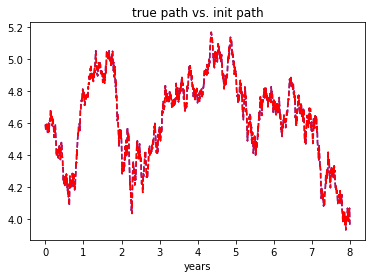

In [30]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]
# neg vol (pred): 0


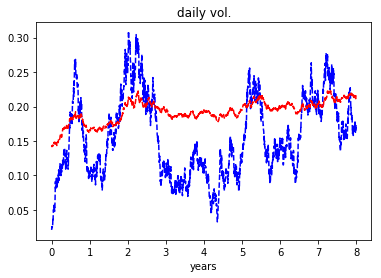

In [31]:
print("# neg vol:", sum(y[1,1:].T<0))
print("# neg vol (pred):", sum(vol_<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, vol_.T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()